curvePointsX=[0.0, 0.0035671819262782407, 0.01426872770511296, 0.03210463733650416, 0.05707491082045184, 0.08917954815695602, 0.12841854934601665, 0.17479191438763372, 0.22829964328180735, 0.2889417360285375, 0.3567181926278241, 0.43162901307966695, 0.5136741973840666, 0.6028537455410226, 0.6991676575505349, 0.8026159334126042, 0.9131985731272294, 1.0309155766944111, 1.1557669441141503, 1.2877526753864448, 1.4268727705112965, 1.5731272294887042, 1.7265160523186678, 1.887039239001189, 2.0546967895362664, 2.2294887039239, 2.4114149821640902, 2.600475624256837, 2.7966706302021396, 3.0]
curvePointsY=[0.0, 0.10332526958874902, 0.20591250153757842, 0.3070236582065685, 0.40592070195579966, 0.5018655951453524, 0.5941203001353069, 0.6819467792857434, 0.7646069949567428, 0.841362909508385, 0.9114764853007503, 0.9742096846939194, 1.0288244700479725, 1.0745828037229899, 1.110746648079052, 1.1365779654762391, 1.151338718274632, 1.1542908688343105, 1.1446963795153553, 1.1218172126778465, 1.084915330

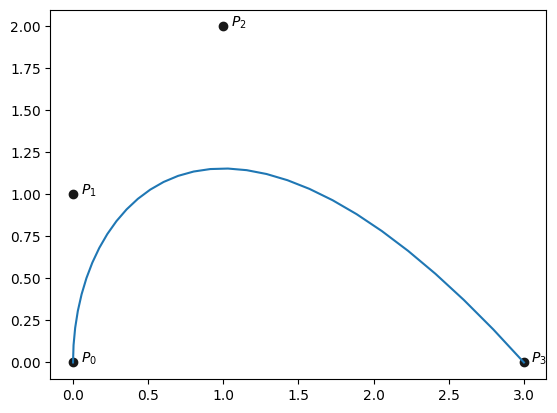

In [2]:
class Point:
    def __init__(self, x, y) -> None:
        self.x = x
        self.y = y
    
    def __add__(self, other):
        return Point(self.x+other.x, self.y+other.y)
    
    def __radd__(self, other):
        return Point(self.x+other.x, self.y+other.y)
    
    def __str__(self):
        return f"{{x:{self.x}, y: {self.y}}}"

    def __mul__(self, other: float):
        return Point(self.x*other, self.y*other)
    
    def __rmul__(self, other: float):
        return self*other
    
def Bernstein(i, n, u):
    temp = [0.0 for j in range(0, n+1)]
    temp[n-i] = 1.0
    u1 = 1.0-u
    for k in range(1, n+1):
        for j in range(n, k-1, -1):
            temp[j] = u1*temp[j]+u*temp[j-1]
    return temp[n]

def allBernstein(n, u):
    B = [0.0 for j in range(0, n+1)]
    B[0] = 1.0
    u1 = 1.0 - u
    for j in range(1, n+1):
        saved = 0.0
        for k in range(0, j):
            temp = B[k]
            B[k] = saved + u1*temp
            saved = u*temp
        B[j] = saved
    return B


def pointOnBezierCurve(P, n, u):
    B = allBernstein(n, u)
    C = Point(0.0,0.0)
    for k in range(0, n+1):
        C += C + B[k]*P[k]
    return C

import copy

def deCasteljau1(P,n,u):
    Q = copy.deepcopy(P)
    for k in range(1, n+1):
        for i in  range(0, n-k+1):
            Q[i] = (1.0-u)*Q[i]+u*Q[i+1]
    return Q[0]

P = [
    Point(0,0),
    Point(0,1),
    Point(1,2),
    Point(3,0)
]

import numpy as np

pointsNumber = 30
curvePointsX = []
curvePointsY = []

grid = np.linspace(0, 1, pointsNumber)

for u in grid:
    C = deCasteljau1(P, len(P)-1, u)
    curvePointsX.append(C.x)
    curvePointsY.append(C.y)

print(f"{curvePointsX=}")
print(f"{curvePointsY=}")

pointsX = list(map(lambda e: e.x, P))
pointsY = list(map(lambda e: e.y, P))

print(f"{pointsX=}")
print(f"{pointsY=}")


import matplotlib.pyplot as plt

plt.plot(curvePointsX, curvePointsY)
plt.scatter(pointsX, pointsY, color="#181818")
for i in range(len(pointsX)):
    plt.annotate(f"$P_{i}$", (pointsX[i]+0.05, pointsY[i]))


In [3]:
class Point3:
    def __init__(self, x, y, z) -> None:
        self.x = x
        self.y = y
        self.z = z
    
    def __add__(self, other):
        return Point3(self.x+other.x, self.y+other.y, self.z+other.z)
    
    def __str__(self):
        return f"{{x:{self.x}, y: {self.y}, z: {self.z}}}"

    def __mul__(self, other: float):
        return Point3(self.x*other, self.y*other, self.z*other)
    
    def __rmul__(self, other: float):
        return self*other
    
def deCasteljau2(P, n, m, u0, v0):
    Q = []
    if(n <= m):
        for j in range(0, m+1):
            Q.append(deCasteljau1(P[j], n, u0))
        return deCasteljau1(Q, m, v0)
    else:
        for i in range(0, n+1):
            Q.append(deCasteljau1(P[:, i], m, v0))
        return deCasteljau1(Q, n, u0)


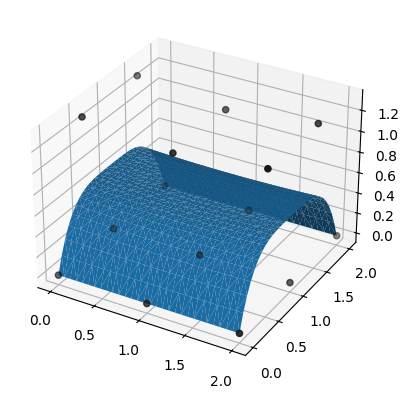

In [4]:
P = np.array(
    [[Point3(0,0,0),Point3(1,0,0),Point3(2,0,0)],
     [Point3(0,0.5,1.3),Point3(1,0.5,1.2),Point3(2,0.5,1.3)],
     [Point3(0,1,0),Point3(1,1,0),Point3(2,1,0)],
     [Point3(0,1.5,1.3),Point3(1,1.5,1.2),Point3(2,1.5,1.3)],
     [Point3(0,2,0),Point3(1,2,0),Point3(2,2,0)]])

pointsX = list(map(lambda e: e.x, P.flat))
pointsY = list(map(lambda e: e.y, P.flat))
pointsZ = list(map(lambda e: e.z, P.flat))


surfaceX = []
surfaceY = []
surfaceZ = []

gridX = np.linspace(0, 1, pointsNumber)
gridY = np.linspace(0, 1, pointsNumber)

for u in gridX:
    for v in gridY:
        S = deCasteljau2(P, len(P[0])-1, len(P)-1, u, v)
        surfaceX.append(S.x)
        surfaceY.append(S.y)
        surfaceZ.append(S.z)

surfaceX = np.array(surfaceX)
surfaceY = np.array(surfaceY)
surfaceZ = np.array(surfaceZ)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pointsX, pointsY, pointsZ, color="#181818")
ax.plot_trisurf(surfaceX, surfaceY, surfaceZ)


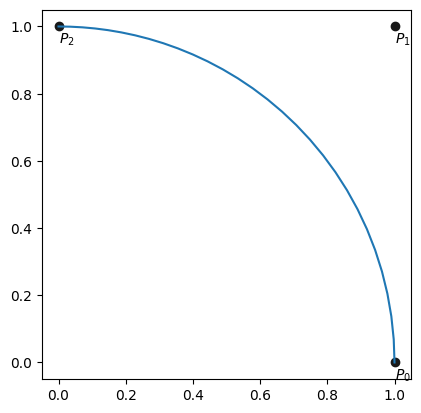

In [5]:
points = [
    Point3(1,0,1), Point3(1,1,1), Point3(0,2,2)
]

omega = list(map(lambda e: e.z, points))

pointsX = list(map(lambda e: e.x/e.z, points))
pointsY = list(map(lambda e: e.y/e.z, points))

curveX = []
curveY = []

for u in np.linspace(0, 1, pointsNumber):
    C = deCasteljau1(points, len(points)-1, u)
    B = allBernstein(len(points)-1, u)
    H = 0
    for w, b in zip(omega, B):
        H+=w*b
    curveX.append(C.x/H)
    curveY.append(C.y/H)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(curveX, curveY)
ax.scatter(pointsX, pointsY, color="#181818")
ax.set_aspect('equal', 'box')
for i in range(len(pointsX)):
    ax.annotate(f"$P_{i}$", (pointsX[i], pointsY[i]-0.05))


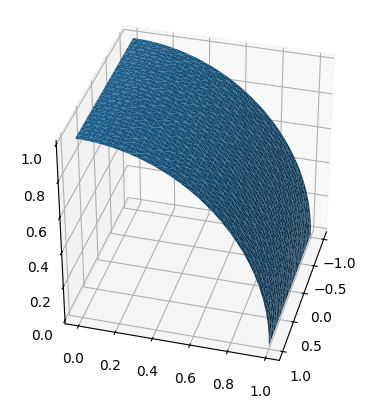

In [6]:
class Point4:
    def __init__(self, x, y, z, w) -> None:
        self.x = x
        self.y = y
        self.z = z
        self.w = w
    
    def __add__(self, other):
        return Point4(self.x+other.x, self.y+other.y, self.z+other.z, self.w+other.w)
    
    def __str__(self):
        return f"{{x:{self.x}, y: {self.y}, z: {self.z}, w: {self.w}}}"

    def __mul__(self, other: float):
        return Point4(self.x*other, self.y*other, self.z*other, self.w*other)
    
    def __rmul__(self, other: float):
        return self*other

Pw = np.array([
    [Point4(1,1,0,1), Point4(1,1,1,1), Point4(2,0,2,2)],
    [Point4(-1,1,0,1), Point4(-1,1,1,1), Point4(-2,0,2,2)]
])

omega = list(map(lambda e: [x.w for x in e], Pw))

surfaceX = []
surfaceY = []
surfaceZ = []

gridX = np.linspace(0, 1, pointsNumber)
gridY = np.linspace(0, 1, pointsNumber)

for u in gridX:
    for v in gridY:
        S = deCasteljau2(Pw, len(Pw[0])-1, len(Pw)-1, u, v)
        H = 0
        Bn = allBernstein(len(Pw[0])-1, u)
        Bm = allBernstein(len(Pw)-1, v)
        for r in range(0, len(Pw[0])):
            for s in range(0, len(Pw)):
                H += Bn[r]*Bm[s]*omega[s][r]
        surfaceX.append(S.x/H)
        surfaceY.append(S.y/H)
        surfaceZ.append(S.z/H)

surfaceX = np.array(surfaceX)
surfaceY = np.array(surfaceY)
surfaceZ = np.array(surfaceZ)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_aspect('equal', 'box')
# ax.scatter(pointsX, pointsY, pointsZ, color="#181818")
ax.plot_trisurf(surfaceX, surfaceY, surfaceZ)
ax.view_init(elev=35, azim=15)

In [7]:
from math import floor

def findSpan(n,p,u,U):
    if u == U[n+1]:
        return n
    low = p
    high = n+1
    mid = floor((low+high)/2)
    while u<U[mid] or u >= U[mid+1]:
        if u < U[mid]:
            high = mid
        else:
            low = mid
        mid = floor((low+high)/2)
    return mid

In [8]:
U = [0,0,0,1,2,3,4,4,5,5,5]
u = 5/2
p = 2
n = len(U)-p-1
print(findSpan(n,p,u,U))

4


In [9]:
def BasisFunc(i, u, p, U):
    N = [0 for i in range(p+1)]
    left = [0 for i in range(p+1)]  
    right = [0 for i in range(p+1)]
    N[0] = 1.0
    for j in range(1, p+1):
        left[j]=u-U[i+1-j]
        right[j]=U[i+j]-u
        saved = 0.0
        for r in range(0,j):
            temp = N[r]/(right[r+1]+left[j-r])
            N[r] = saved+right[r+1]*temp
            saved = left[j-r]*temp
        N[j] = saved
    return N

In [10]:
print(BasisFunc(4,u,p,U))

[0.125, 0.75, 0.125]


In [11]:
def BSplinePoint(n,p,U,P,u):
    span = findSpan(n,p,u,U)
    N = BasisFunc(span, u, p, U)
    C = Point(0,0)
    for i in  range(0, p+1):
        C = C + N[i]*P[span-p+i]
    return C

curvePointsX=[0.0, 0.0047562425683709865, 0.019024970273483946, 0.04280618311533888, 0.07609988109393578, 0.11890606420927469, 0.17122473246135553, 0.23305588585017833, 0.3032104637336504, 0.37878187343110054, 0.45963799709340736, 0.5457788347205706, 0.6372043863125908, 0.7339146518694676, 0.8359096313912009, 0.9431893248777911, 1.0557537323292376, 1.1736028537455407, 1.2967366891267011, 1.4251552384727173, 1.558858501783591, 1.6978464790593208, 1.8421191702999076, 1.9916765755053507, 2.1465186946756507, 2.306645527810807, 2.47205707491082, 2.6427533359756894, 2.8187343110054166, 3.0]
curvePointsY=[0.0, 0.26159334126040423, 0.4946492271105827, 0.6991676575505351, 0.8751486325802615, 1.022592152199762, 1.1414982164090368, 1.2318668252080855, 1.2984542211652794, 1.352886775003303, 1.3956929581186417, 1.426872770511296, 1.4464262121812657, 1.4543532831285506, 1.450653983353151, 1.4353283128550665, 1.4083762716342976, 1.3697978596908442, 1.319593077024706, 1.257761923635883, 1.184304399524

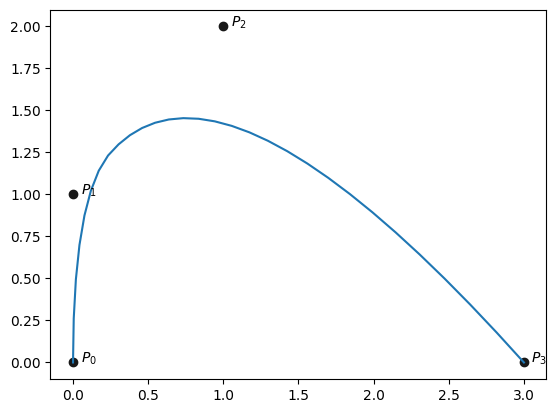

In [15]:


P = [
    Point(0,0),
    Point(0,1),
    Point(1,2),
    Point(3,0)
]

U = [0,0,0,1/4,1,1,1]
p = 2

curvePointsX = []
curvePointsY = []

pointsX = list(map(lambda e: e.x, P))
pointsY = list(map(lambda e: e.y, P))

for u in np.linspace(0, 1, pointsNumber):
    C = BSplinePoint(len(P)-1,p, U, P, u)
    curvePointsX.append(C.x)
    curvePointsY.append(C.y)

print(f"{curvePointsX=}")
print(f"{curvePointsY=}")

import matplotlib.pyplot as plt

plt.plot(curvePointsX, curvePointsY)
plt.scatter(pointsX, pointsY, color="#181818")
for i in range(len(pointsX)):
    plt.annotate(f"$P_{i}$", (pointsX[i]+0.05, pointsY[i]))

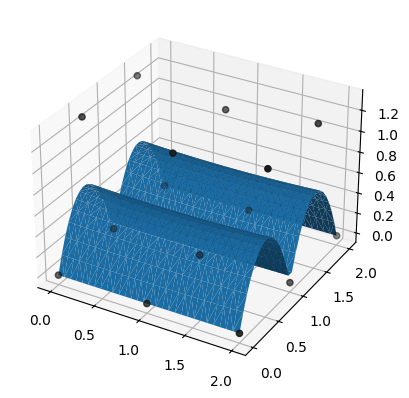

In [55]:
P = np.array(
    [[Point3(0,0,0),Point3(1,0,0),Point3(2,0,0)],
     [Point3(0,0.5,1.3),Point3(1,0.5,1.2),Point3(2,0.5,1.3)],
     [Point3(0,1,0),Point3(1,1,0),Point3(2,1,0)],
     [Point3(0,1.5,1.3),Point3(1,1.5,1.2),Point3(2,1.5,1.3)],
     [Point3(0,2,0),Point3(1,2,0),Point3(2,2,0)]])

# P = np.array(
#     [[Point3(0,0,0),Point3(1,0,0),Point3(2,0,0)],
#      [Point3(0,0.5,1.3),Point3(1,0.5,1.2),Point3(2,0.5,1.3)],
#      [Point3(0,1,0),Point3(1,1,0),Point3(2,1,0)],
#      [Point3(0,1.5,1.3),Point3(1,1.5,1.2),Point3(2,1.5,1.3)],
#      [Point3(0,2,0),Point3(1,2,0),Point3(2,2,0)]])
p = 2
q = 2

U = [0,0,0,1/2,1/2,1,1,1]
V = [0,0,0,1,1,1]

def BSplineSurfacePoint(n,p,U,m,q,V,P,u,v):
    uspan = findSpan(n,p,u,U)
    Nu = BasisFunc(uspan,u,p,U)
    vspan = findSpan(m,q,v,V)
    Nv = BasisFunc(vspan,v,q,V)
    uind = uspan-p
    S = Point3(0,0,0)
    for l in range(q+1):
        temp = Point3(0,0,0)
        vind = vspan-q+l
        for k in range(p+1):
            temp = temp+ Nu[k]*P[uind+k][vind]
        S = S + Nv[l]*temp
    return S

surfaceX = []
surfaceY = []
surfaceZ = []

for u in np.linspace(0, 1, pointsNumber):
    for v in np.linspace(0, 1, pointsNumber):
        S = BSplineSurfacePoint(len(P)-1, p, U, len(P[0])-1, q, V, P, u,v)
        surfaceX.append(S.x)
        surfaceY.append(S.y)
        surfaceZ.append(S.z)

surfaceX = np.array(surfaceX)
surfaceY = np.array(surfaceY)
surfaceZ = np.array(surfaceZ)

pointsX = list(map(lambda e: e.x, P.flat))
pointsY = list(map(lambda e: e.y, P.flat))
pointsZ = list(map(lambda e: e.z, P.flat))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pointsX, pointsY, pointsZ, color="#181818")
ax.plot_trisurf(surfaceX, surfaceY, surfaceZ)


